# **COMPUTER VISION**

> Program ini dikembangkan untuk mendeteksi tipe kulit berdasarkan gambar menggunakan model Machine Learning. Dengan menggunakan dataset yang mencakup gambar kulit berminyak, kering, dan normal, program ini bertujuan meningkatkan akurasi identifikasi tipe kulit. Hal ini akan membantu pengguna dalam memilih produk perawatan yang lebih efektif dan mendukung dokter kulit dalam memberikan rekomendasi yang tepat.

---

# Topik Permasalahan

Deteksi Tipe Kulit Menggunakan Model Machine Learning untuk Meningkatkan Akurasi Rekomendasi Perawatan Kulit.

# Latar Belakang Masalah

>Tipe kulit yang berbeda, seperti kulit berminyak, kering, dan normal, memerlukan pendekatan perawatan yang berbeda. Pemahaman yang tepat tentang tipe kulit sangat penting untuk memberikan rekomendasi perawatan yang efektif dan personal. Meskipun banyak produk perawatan kulit yang tersedia di pasaran, kesulitan dalam menentukan tipe kulit yang tepat sering kali menyebabkan penggunaan produk yang tidak sesuai, yang dapat berakibat negatif pada kesehatan kulit. Penggunaan teknologi dan analisis berbasis data dapat membantu dalam mengidentifikasi tipe kulit secara lebih akurat. Oleh karena itu, pengembangan model prediksi berbasis gambar kulit menjadi penting untuk meningkatkan akurasi dalam rekomendasi perawatan kulit.

# Problem Statement Using **SMART**

-**Specific**: Proyek ini bertujuan untuk mengembangkan model Machine Learning yang dapat mengidentifikasi tipe kulit berdasarkan gambar.

-**Measurable**: Model ini diharapkan dapat mencapai akurasi prediksi minimal 85% dalam mengklasifikasikan tipe kulit sebagai berminyak, kering, atau normal.

-**Achievable**: Dengan menggunakan dataset gambar yang representatif, proyek ini akan melibatkan teknik analisis data dan pemodelan yang terbukti efektif.

-**Relevant**: Pengembangan model ini relevan untuk meningkatkan proses rekomendasi perawatan kulit dan membantu pengguna memilih produk yang sesuai dengan tipe kulit mereka.

-**Time-Bound**: Proyek ini akan diselesaikan dalam jangka waktu 6 bulan, termasuk pengumpulan data, pengembangan model, dan evaluasi hasil.

# Import Libraries

In [20]:
# path manipulation
import os

# data manipulation
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# file path
from pathlib import Path

# modelling
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# ignore warning
import warnings
warnings.filterwarnings('ignore')

from PIL import ImageFile, Image
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Data Loading

In [21]:
#define path

main_path = '/D:\Bootcamp\Phase 2\GC7\p2-ftds020-hck-g7-abimanyukayana\Oily-Dry-Skin-Types/'
train_path = os.path.join(main_path, 'D:\Bootcamp\Phase 2\GC7\p2-ftds020-hck-g7-abimanyukayana\Oily-Dry-Skin-Types/train')
test_path = os.path.join(main_path, 'D:\Bootcamp\Phase 2\GC7\p2-ftds020-hck-g7-abimanyukayana\Oily-Dry-Skin-Types/test')
valid_path = os.path.join(main_path, 'D:\Bootcamp\Phase 2\GC7\p2-ftds020-hck-g7-abimanyukayana\Oily-Dry-Skin-Types/valid')

# Jumlah dataset training dan testing

In [22]:
# Check how many data in `train_path` and `test_path`
def check_path(path):
  labels = os.listdir(path)
  for label in labels:
    # Check if the item is a directory before trying to list its contents
    if os.path.isdir(os.path.join(path, label)):
      num_data = len(os.listdir(os.path.join(path, label)))
      print(f'Total Data - {label} : {num_data}')

print('Training Dataset')
check_path(train_path)
print('')

print('Testing Dataset')
check_path(test_path)
print('')

print('Validation Dataset')
check_path(valid_path)
print('')

Training Dataset
Total Data - dry : 652
Total Data - normal : 1104
Total Data - oily : 1000

Testing Dataset
Total Data - dry : 35
Total Data - normal : 59
Total Data - oily : 40

Validation Dataset
Total Data - dry : 71
Total Data - normal : 111
Total Data - oily : 80



# Exploratory Data Analysis

In [23]:
def plot_images(path):
  labels = os.listdir(path)
  for label in labels:
    folder_path = os.path.join(path, label)
    # Check if the item is a directory before trying to list its contents
    if os.path.isdir(folder_path):
      fig = plt.figure(figsize=(20, 20))
      columns = 5
      rows = 1
      print('Class : ', label)
      images = os.listdir(folder_path)
      for index in range(1, columns*rows +1):
          fig.add_subplot(rows, columns, index)
          image = plt.imread(os.path.join(folder_path, images[index]))
          plt.imshow(image)
          plt.axis("off")
      plt.show()

Class :  dry


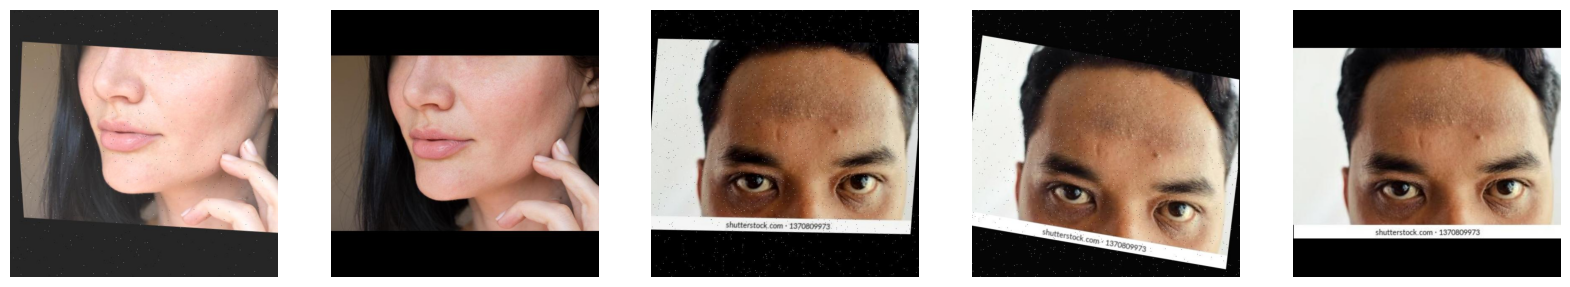

Class :  normal


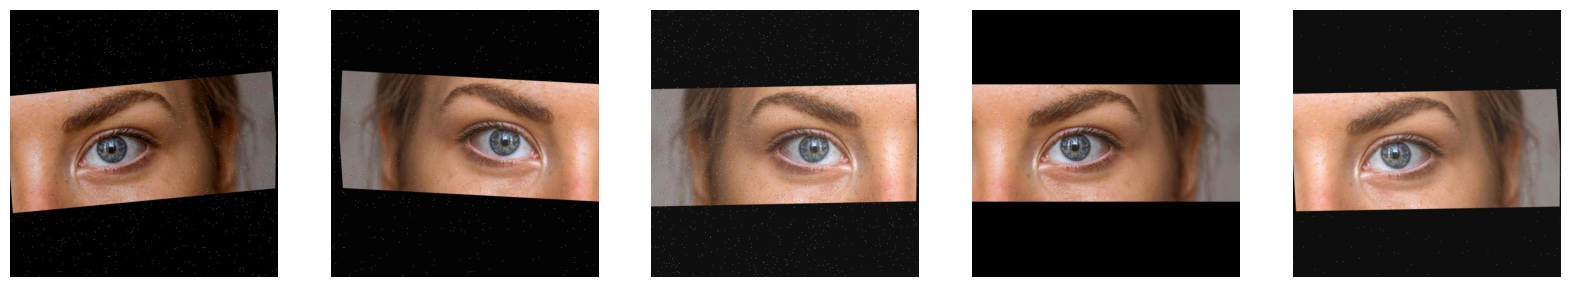

Class :  oily


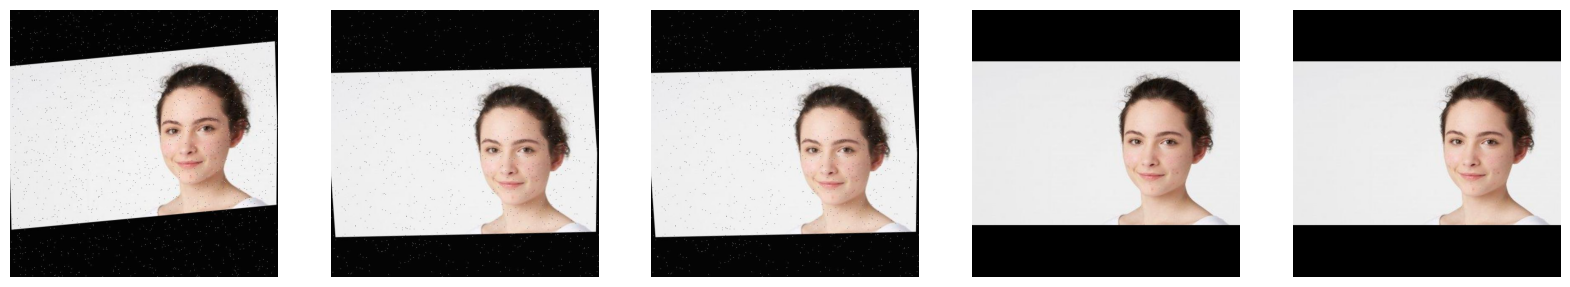

In [24]:
plot_images(train_path)

Class :  dry


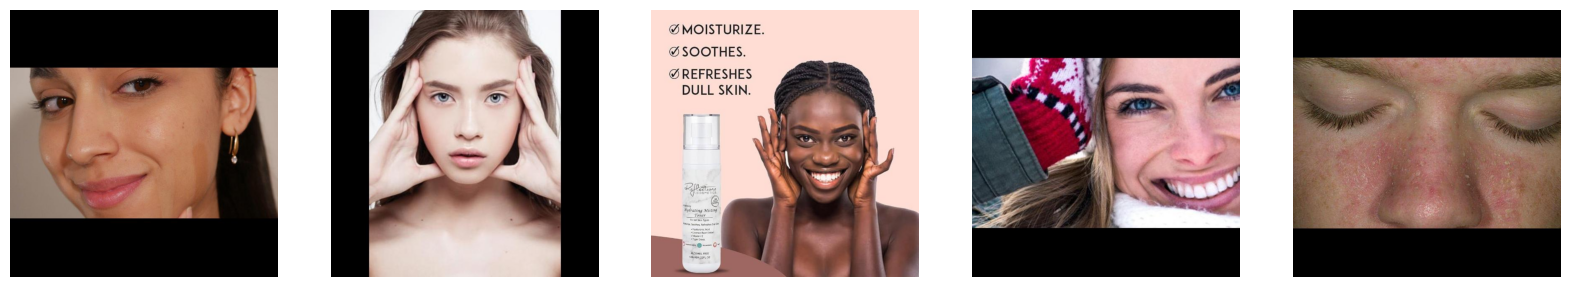

Class :  normal


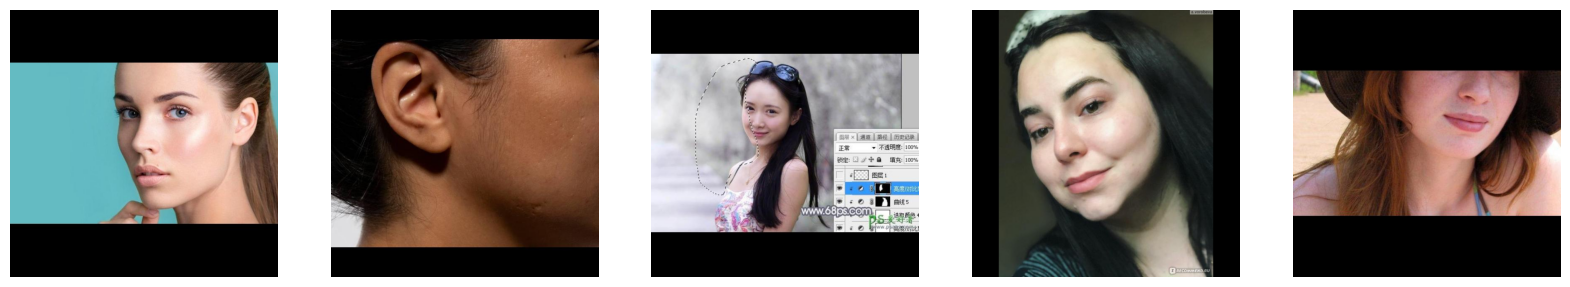

Class :  oily


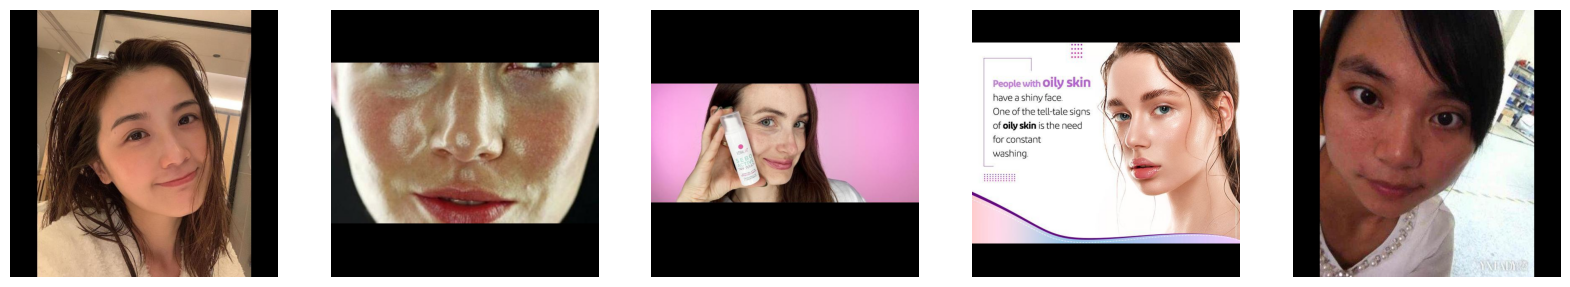

In [25]:
plot_images(test_path)

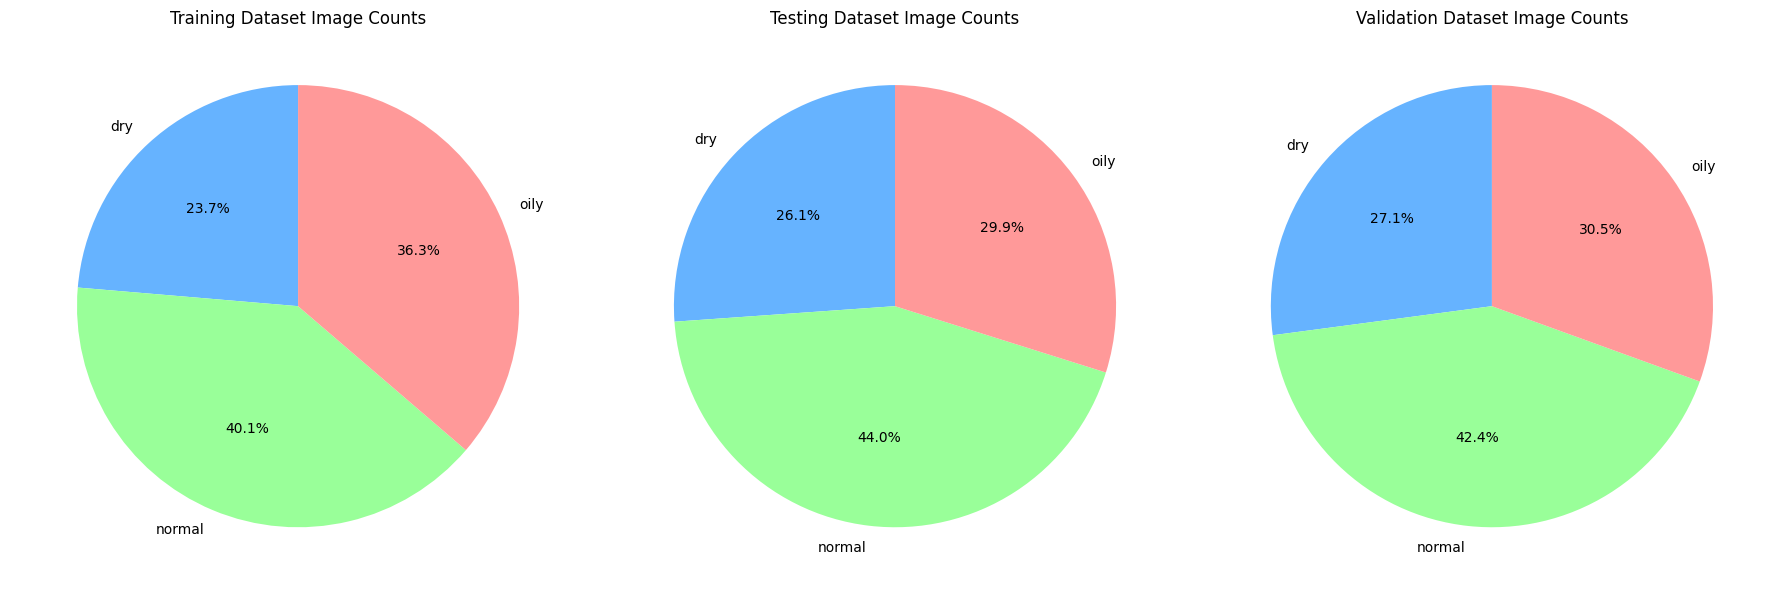

In [26]:
def group_and_count_images(path):
    category_counts = {}

    # List all categories (subfolders) in the main path
    for category in os.listdir(path):
        category_path = os.path.join(path, category)

        # Check if it's a directory (category)
        if os.path.isdir(category_path):
            # List all files (images) in the category folder
            image_files = os.listdir(category_path)

            # Count the number of image files
            category_counts[category] = len(image_files)

    return category_counts

# Define paths
main_path = 'D:/Bootcamp/Phase 2/GC7/p2-ftds020-hck-g7-abimanyukayana/Oily-Dry-Skin-Types/'
train_path = os.path.join(main_path, 'train')
test_path = os.path.join(main_path, 'test')
valid_path = os.path.join(main_path, 'valid')

# Count images in train, test, and validation sets
train_image_counts = group_and_count_images(train_path)
test_image_counts = group_and_count_images(test_path)
valid_image_counts = group_and_count_images(valid_path)

colors = {
    'oily': '#ff9999',
    'dry': '#66b3ff',   
    'normal': '#99ff99'
}

# Function to plot side-by-side pie charts with consistent colors
def plot_side_by_side_pie_charts(train_data, test_data, valid_data):
    labels_train = list(train_data.keys())  # The categories for training
    sizes_train = list(train_data.values())  # The counts for training

    labels_test = list(test_data.keys())  # The categories for testing
    sizes_test = list(test_data.values())  # The counts for testing

    labels_valid = list(valid_data.keys())  # The categories for validation
    sizes_valid = list(valid_data.values())  # The counts for validation

    # Map the colors for each label
    train_colors = [colors[label] for label in labels_train]
    test_colors = [colors[label] for label in labels_test]
    valid_colors = [colors[label] for label in labels_valid]

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

    # Pie chart for training data
    ax1.pie(sizes_train, labels=labels_train, colors=train_colors, autopct='%1.1f%%', startangle=90)
    ax1.set_title('Training Dataset Image Counts')
    ax1.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

    # Pie chart for testing data
    ax2.pie(sizes_test, labels=labels_test, colors=test_colors, autopct='%1.1f%%', startangle=90)
    ax2.set_title('Testing Dataset Image Counts')
    ax2.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

    # Pie chart for validation data
    ax3.pie(sizes_valid, labels=labels_valid, colors=valid_colors, autopct='%1.1f%%', startangle=90)
    ax3.set_title('Validation Dataset Image Counts')
    ax3.axis('equal') 

    # Display all pie charts
    plt.tight_layout()  
    plt.show()

# Plot side-by-side pie charts for training, testing, and validation datasets
plot_side_by_side_pie_charts(train_image_counts, test_image_counts, valid_image_counts)


Dari chart diatas diketahui dibagi menjadi tiga bagian: training, testing, dan validation. Setiap bagian terdiri dari tiga kategori tipe kulit, yaitu kering, berminyak, dan normal. Hasil distribusi data untuk masing-masing tipe kulit dapat dilihat pada Gambar X.

- Kulit normal merupakan tipe kulit yang paling dominan pada ketiga dataset, dengan proporsi 40.1% pada training set, 44.0% pada testing set, dan 42.4% pada validation set.
- Kulit berminyak memiliki jumlah yang sedang, dengan proporsi 36.3% pada training set, 29.9% pada testing set, dan 30.5% pada validation set.
- Kulit kering merupakan kategori dengan jumlah paling sedikit, dengan distribusi 23.7% pada training set, 26.1% pada testing set, dan 27.1% pada validation set.

> Distribusi ini menunjukkan bahwa meskipun terdapat variasi antar tipe kulit, dataset memiliki proporsi yang seimbang di seluruh bagian (training, testing, validation). Hal ini memastikan bahwa model yang dilatih menggunakan data ini akan memiliki representasi yang cukup untuk setiap tipe kulit, sehingga meminimalkan bias model terhadap tipe kulit tertentu

# CNN Base Model

## Pre-Processing

In [27]:
# define hyperparameter
img_height = 220
img_width = 220
batch_size = 64

In [28]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.,
                                                                validation_split=0.3)

train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(img_height,img_width),
                                              class_mode='sparse',
                                              subset='training',
                                              batch_size=batch_size,
                                              shuffle=True,
                                              seed=10)

val_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(img_height,img_width),
                                              class_mode='sparse',
                                              subset='validation',
                                              batch_size=batch_size,
                                              shuffle=True,
                                              seed=10)

test_datagen =tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(img_height,img_width),
                                            class_mode='sparse',
                                            batch_size=batch_size,
                                            shuffle=False,
                                            seed=10)

Found 1930 images belonging to 3 classes.
Found 826 images belonging to 3 classes.
Found 134 images belonging to 3 classes.


In [29]:
train_set.class_indices

{'dry': 0, 'normal': 1, 'oily': 2}

In [30]:
test_set.class_indices

{'dry': 0, 'normal': 1, 'oily': 2}

In [31]:
val_set.class_indices

{'dry': 0, 'normal': 1, 'oily': 2}

## Model Definition

In [32]:
# clear session

seed = 10
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', strides=(1,1), activation='relu', input_shape=(img_height, img_width,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', strides=(1,1), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), padding='same', strides=(1,1), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), padding='same', strides=(1,1), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))

# compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 220, 220, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 110, 110, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 55, 55, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 55, 55, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 27, 27, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 27, 27, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    11,075,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,465,541 (43.74 MB)

 Trainable params: 11,465,541 (43.74 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [33]:
history = model.fit(train_set,
                    validation_data=val_set,
                    epochs=30)

Epoch 1/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.3735 - loss: 1.3165 - val_accuracy: 0.3801 - val_loss: 1.0901
Epoch 2/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.3898 - loss: 1.0860 - val_accuracy: 0.3644 - val_loss: 1.0869
Epoch 3/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.4360 - loss: 1.0660 - val_accuracy: 0.3668 - val_loss: 1.1052
Epoch 4/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.4511 - loss: 1.0316 - val_accuracy: 0.3378 - val_loss: 1.1535
Epoch 5/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.5545 - loss: 0.9326 - val_accuracy: 0.3717 - val_loss: 1.2486
Epoch 6/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.6020 - loss: 0.8504 - val_accuracy: 0.3196 - val_loss: 1.6563
Epoch 7/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.7104 - loss: 0.6692 - val_accuracy: 0.3002 - val_loss: 1.8173
Epoch 8/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.8181 - loss: 0.4630 - val_accuracy: 0.3232 - val_loss:

> Setelah 30 epoch pelatihan, akurasi model meningkat dari 37,35% menjadi 99,41%. Namun, akurasi validasi tidak stabil, dengan puncaknya hanya 38,01% di epoch pertama dan 36,20% di epoch ke-10. Loss pelatihan menurun dari 1,3165 menjadi 0,0105, tetapi loss validasi fluktuatif, tertinggi di 5,8545 pada epoch ke-17. Ini menunjukkan model mungkin mengalami overfitting, terlalu baik di data pelatihan tapi kurang pada data validasi

## Model Evaluation

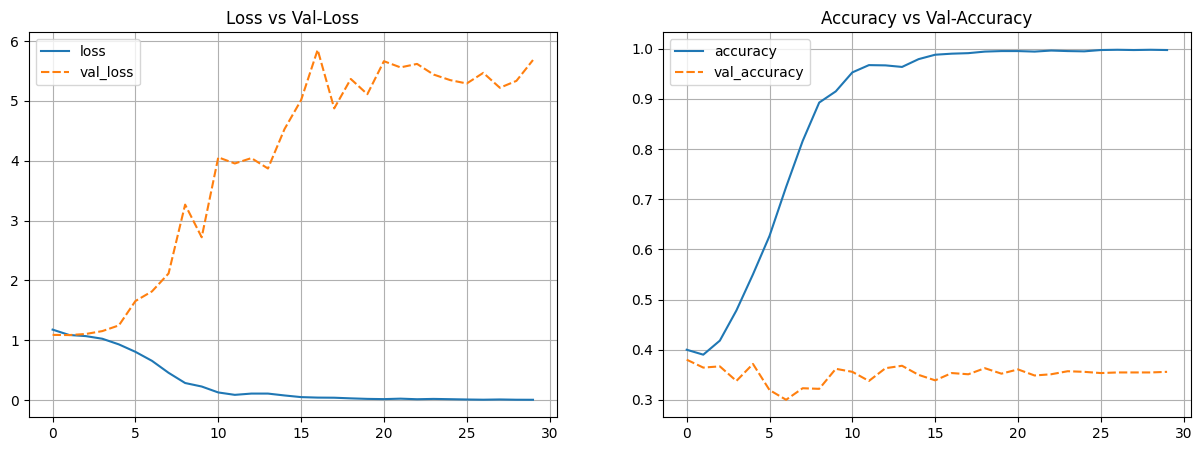

In [34]:
# Plot training results

history_df = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

**(Loss vs Val-Loss)**:

- Loss (garis biru): Ini menunjukkan seberapa baik model belajar dari data pelatihan. Kita bisa lihat bahwa nilainya terus menurun, yang berarti model semakin baik dalam mengatasi data pelatihan.
- Val-Loss (garis oranye): Ini menunjukkan performa model pada data validasi. Awalnya, nilai ini juga menurun, tetapi mulai fluktuatif dan meningkat di akhir. Ini bisa jadi tanda bahwa model mulai "terlalu cocok" dengan data pelatihan, sehingga tidak berfungsi dengan baik pada data baru.

**(Accuracy vs Val-Accuracy)**:

- Accuracy (garis biru): Ini menunjukkan seberapa akurat model pada data pelatihan. Angkanya naik terus hingga hampir 100%, yang berarti model sangat akurat dalam klasifikasi data pelatihan.
- Val-Accuracy (garis oranye): Ini menunjukkan akurasi pada data validasi. Meskipun akurasinya juga meningkat, nilainya tidak setinggi akurasi pelatihan. Ini menunjukkan bahwa meskipun model baik pada data pelatihan, performanya di data baru tidak sebaik yang diharapkan.
> Jadi, secara keseluruhan, grafik ini memberi gambaran bahwa model menunjukkan hasil yang baik dalam pelatihan, tetapi ada kemungkinan overfitting karena performanya menurun saat diuji dengan data yang berbeda.

### Model Architecture Plot

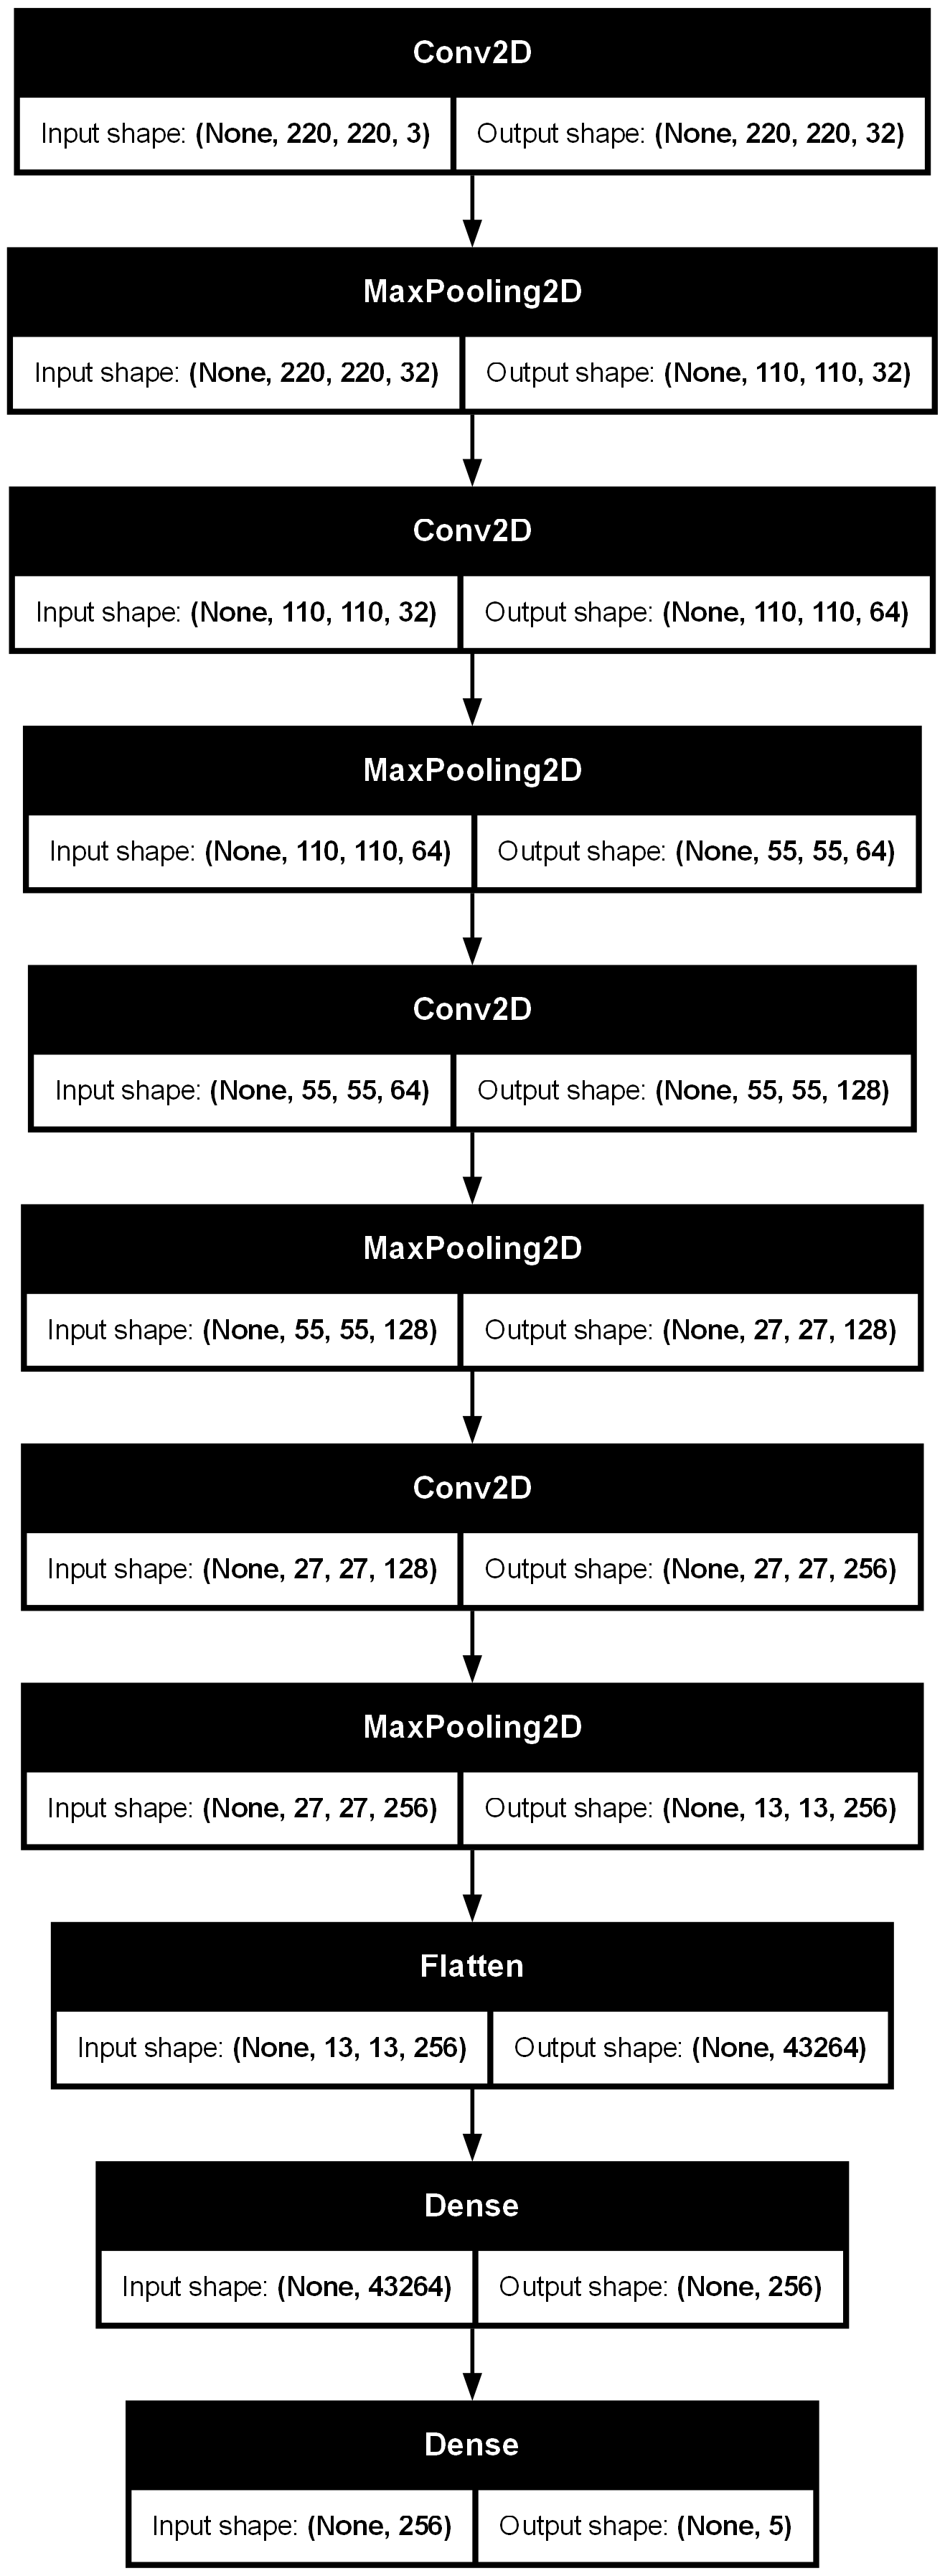

In [35]:
tf.keras.utils.plot_model(model, show_shapes=True)


### Classification Report

In [36]:
# Check the performance of test-set

## Get the probability
y_pred_prob = model.predict(test_set)

## Get class with maximum probability
y_pred_class = np.argmax(y_pred_prob, axis=-1)

## Display Classification Report
print(classification_report(test_set.classes, y_pred_class, target_names=np.array(list(train_set.class_indices.keys()))))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step
              precision    recall  f1-score   support

         dry       0.24      0.23      0.24        35
      normal       0.47      0.56      0.51        59
        oily       0.35      0.28      0.31        40

    accuracy                           0.39       134
   macro avg       0.36      0.35      0.35       134
weighted avg       0.38      0.39      0.38       134



Model memiliki akurasi yang rendah (39%), yang menunjukkan bahwa performanya tidak memuaskan dalam mengklasifikasikan jenis kulit.
Kelas "normal" memiliki performa terbaik dengan precision dan recall tertinggi, menunjukkan model lebih mampu mengenali jenis kulit normal dibandingkan yang lain.
Kelas "dry" dan "oily" menunjukkan performa yang lebih buruk, dengan nilai precision dan recall di bawah 0.35.
Secara keseluruhan, model perlu ditingkatkan baik dalam hal pengumpulan data maupun arsitektur agar dapat meningkatkan akurasi dan kinerja klasifikasi.

### Confusion Matrix

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 417ms/step


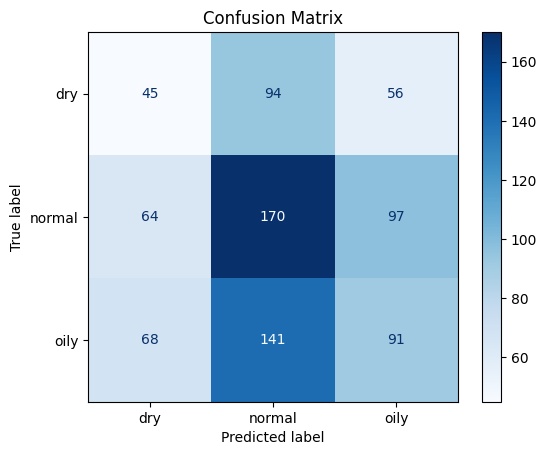

In [37]:
# 1. Melakukan prediksi pada validation set
# Jika Anda ingin confusion matrix dari data validasi, gunakan val_set
y_pred = model.predict(val_set)

# 2. Konversi probabilitas prediksi menjadi label (kelas dengan nilai tertinggi)
# Misal, jika model output berupa probabilitas dari beberapa kelas
y_pred_labels = np.argmax(y_pred, axis=1)

# 3. Mendapatkan label asli dari data validasi
# val_set.classes berisi label asli dari data validasi
y_true_labels = val_set.classes

# 4. Membuat confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# 5. Menampilkan confusion matrix dalam bentuk plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_set.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)  # Menampilkan confusion matrix dengan warna biru

plt.title('Confusion Matrix')
plt.show()


Confusion matrix di atas menunjukkan kinerja model dalam memprediksi tiga jenis kulit: kering, normal, dan berminyak.

Model bekerja paling baik untuk kulit normal dengan 170 prediksi benar.
Namun, ada banyak kesalahan, seperti 94 data kering yang diprediksi sebagai normal dan 141 data berminyak juga diprediksi sebagai normal.
Secara keseluruhan, model lebih sering salah memprediksi kulit kering dan berminyak, yang memerlukan peningkatan akurasi

Dari hasil confusion matrix di atas, terlihat bahwa model mengalami banyak kesalahan dalam memprediksi kategori kulit, terutama pada kulit kering dan berminyak yang sering diklasifikasikan sebagai normal. Untuk mengatasi masalah ini, perlu dilakukan CNN model improvement agar akurasi prediksi meningkat dan kesalahan klasifikasi dapat diminimalisir.

Perbaikan ini bertujuan untuk membuat model lebih mampu membedakan karakteristik yang spesifik dari setiap jenis kulit, sehingga hasil klasifikasinya menjadi lebih tepat dan akurat.

# CNN Model Improvement

In [38]:
# define hyperparameter
img_height = 224
img_width = 224
batch_size = 64

In [39]:

def rgb_to_ycbcr(image):
    # Konversi dari tensor image (NumPy array) ke PIL Image
    image = Image.fromarray((image * 255).astype('uint8'))  # Convert back to 0-255 range for PIL
    # Konversi dari RGB ke YCbCr menggunakan PIL
    ycbcr_image = image.convert('YCbCr')
    # Kembali ke format NumPy array (0-1 range for Keras)
    return np.array(ycbcr_image) / 255.

train_datagen_imp = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=rgb_to_ycbcr,
                                                                rotation_range=20,
                                                                horizontal_flip=True,
                                                                validation_split=0.3)

train_set_imp = train_datagen.flow_from_directory(train_path,
                                              target_size=(img_height,img_width),
                                              class_mode='sparse',
                                              subset='training',
                                              batch_size=batch_size,
                                              shuffle=True,
                                              seed=10)

val_set_imp = train_datagen.flow_from_directory(train_path,
                                              target_size=(img_height,img_width),
                                              class_mode='sparse',
                                              subset='validation',
                                              batch_size=batch_size,
                                              shuffle=True,
                                              seed=10)

test_datagen_imp =tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

test_set_imp = test_datagen.flow_from_directory(test_path,
                                            target_size=(img_height,img_width),
                                            class_mode='sparse',
                                            batch_size=batch_size,
                                            shuffle=False,
                                            seed=10)

Found 1930 images belonging to 3 classes.
Found 826 images belonging to 3 classes.
Found 134 images belonging to 3 classes.


In [40]:
train_set_imp.class_indices

{'dry': 0, 'normal': 1, 'oily': 2}

In [41]:
test_set_imp.class_indices

{'dry': 0, 'normal': 1, 'oily': 2}

In [42]:
val_set_imp.class_indices

{'dry': 0, 'normal': 1, 'oily': 2}

## Model Definition

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, BatchNormalization

# Define hyperparameters
img_height = 224
img_width = 224
batch_size = 64

# Create batch generator for train-set, val-set, and test-set
train_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255.,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    horizontal_flip=True,
    validation_split=0.4
)

train_set_aug = train_datagen_aug.flow_from_directory(train_path,
                                                      target_size=(img_height, img_width),
                                                      class_mode='sparse',
                                                      subset='training',
                                                      batch_size=batch_size,
                                                      shuffle=True,
                                                      seed=2)

val_set_aug = train_datagen_aug.flow_from_directory(train_path,
                                                    target_size=(img_height, img_width),
                                                    class_mode='sparse',
                                                    subset='validation',
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    seed=2)

test_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255.)
test_set_aug = test_datagen_aug.flow_from_directory(test_path,
                                                    target_size=(img_height, img_width),
                                                    class_mode='sparse',
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    seed=2)

# Clear session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Create Sequential API model
model_aug = Sequential()
model_aug.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model_aug.add(BatchNormalization())
model_aug.add(MaxPooling2D(2, 2))

model_aug.add(Conv2D(64, (3, 3), activation='relu'))
model_aug.add(BatchNormalization())
model_aug.add(MaxPooling2D(2, 2))

model_aug.add(Conv2D(128, (3, 3), activation='relu'))
model_aug.add(BatchNormalization())
model_aug.add(MaxPooling2D(2, 2))

model_aug.add(Conv2D(256, (3, 3), activation='relu'))  # Increased complexity
model_aug.add(BatchNormalization())
model_aug.add(MaxPooling2D(2, 2))

model_aug.add(Flatten())
model_aug.add(Dropout(0.3))  # Reduced dropout rate
model_aug.add(Dense(512, activation='relu'))
model_aug.add(Dropout(0.3))  # Reduced dropout rate
model_aug.add(Dense(256, activation='relu'))  # Increased units
model_aug.add(Dropout(0.3))  # Reduced dropout rate
model_aug.add(Dense(6, activation='softmax'))

# Compile with a different learning rate
model_aug.compile(loss='sparse_categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # Adjusted learning rate
                  metrics=['accuracy'])

model_aug.summary()

# Train the model
history_aug = model_aug.fit(train_set_aug, epochs=50, validation_data=val_set_aug, batch_size=batch_size)  # Increased epochs


Found 1655 images belonging to 3 classes.
Found 1101 images belonging to 3 classes.
Found 134 images belonging to 3 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,874,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,398,086 (74.00 MB)

 Trainable params: 19,397,126 (73.99 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 96s 3s/step - accuracy: 0.3483 - loss: 4.7901 - val_accuracy: 0.0881 - val_loss: 2.5883
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.3798 - loss: 2.1566 - val_accuracy: 0.3270 - val_loss: 1.5441
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.3781 - loss: 2.0379 - val_accuracy: 0.2389 - val_loss: 2.7073
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.3803 - loss: 1.8039 - val_accuracy: 0.2825 - val_loss: 1.2930
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.3560 - loss: 1.5549 - val_accuracy: 0.2343 - val_loss: 2.1834
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step - accuracy: 0.3912 - loss: 1.4201 - val_accuracy: 0.2916 - val_loss: 1.3717
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.4278 - loss: 1.2753 - val_accuracy: 0.3569 - val_loss: 1.2543
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.4190 - loss: 1.2499 - val_accuracy: 0.2906 - val_loss:

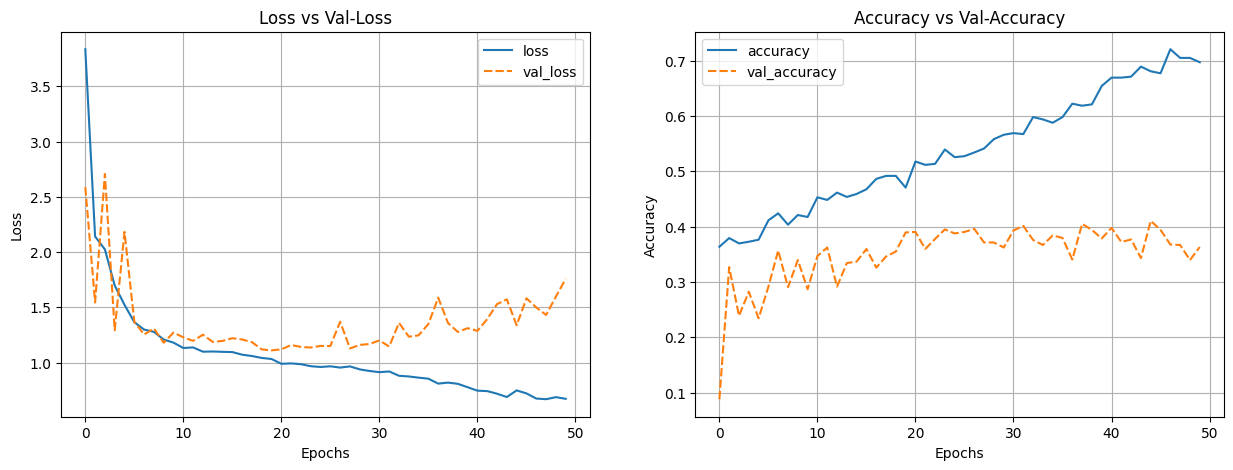

In [59]:
# Plot training results

# Convert history to DataFrame
history_df = pd.DataFrame(history_aug.history)

plt.figure(figsize=(15, 5))

# Plot Loss vs Val-Loss
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Plot Accuracy vs Val-Accuracy
plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

Model kedua menunjukkan hasil pelatihan yang lebih baik dibandingkan model pertama. Dalam grafik Loss vs Val-Loss, loss untuk data pelatihan menunjukkan penurunan yang stabil, sedangkan val-loss tetap relatif stabil, menandakan model mampu belajar dari data tanpa mengalami overfitting yang signifikan. Pada grafik Accuracy vs Val-Accuracy, akurasi pelatihan meningkat secara konsisten mendekati nilai maksimal, sementara val-accuracy tetap stabil, menunjukkan bahwa model ini dapat mempertahankan kinerjanya pada data validasi.

## Model Evaluation

## Classification Report

In [57]:
# Check the performance of test-set

## Get the probability
y_pred_prob_aug = model_aug.predict(test_set_aug)

## Get class with maximum probability
y_pred_class_aug = np.argmax(y_pred_prob_aug, axis=-1)

## Display Classification Report
print(classification_report(test_set_aug.classes, y_pred_class_aug, target_names=np.array(list(train_set_aug.class_indices.keys()))))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step
              precision    recall  f1-score   support

         dry       0.29      0.31      0.30        35
      normal       0.50      0.61      0.55        59
        oily       0.29      0.17      0.22        40

    accuracy                           0.40       134
   macro avg       0.36      0.37      0.36       134
weighted avg       0.38      0.40      0.39       134



performa model ini menunjukkan bahwa meskipun ada beberapa kelas (seperti normal) yang memiliki performa yang lebih baik, model masih perlu diperbaiki, terutama untuk kelas dry dan oily, di mana precision dan recall yang rendah menunjukkan banyak kesalahan klasifikasi. Dengan akurasi hanya 40%, model ini masih jauh dari kinerja optimal dan mungkin memerlukan pelatihan lebih lanjut, penyesuaian arsitektur, atau peningkatan teknik data augmentation untuk meningkatkan hasil.

## Confusion Matrix

18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step


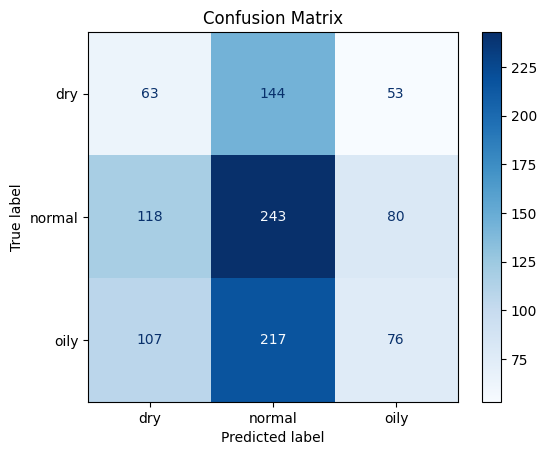

In [58]:
# 1. Melakukan prediksi pada validation set
# Jika Anda ingin confusion matrix dari data validasi, gunakan val_set
y_pred_aug = model_aug.predict(val_set_aug)

# 2. Konversi probabilitas prediksi menjadi label (kelas dengan nilai tertinggi)
# Misal, jika model output berupa probabilitas dari beberapa kelas
y_pred_labels_aug = np.argmax(y_pred_aug, axis=1)

# 3. Mendapatkan label asli dari data validasi
# val_set.classes berisi label asli dari data validasi
y_true_labels_aug = val_set_aug.classes

# 4. Membuat confusion matrix
cm_aug = confusion_matrix(y_true_labels_aug, y_pred_labels_aug)

# 5. Menampilkan confusion matrix dalam bentuk plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm_aug, display_labels=val_set_aug.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)  # Menampilkan confusion matrix dengan warna biru

plt.title('Confusion Matrix')
plt.show()


Prediksi yang tepat pada kategori normal: Model berhasil memprediksi kulit normal dengan benar sebanyak 243 kali, yang menunjukkan kinerja yang baik untuk kategori ini.

Kemampuan mengenali kulit dry dan oily: Meskipun tidak seakurat pada kulit normal, model tetap mampu mengenali kulit dry dan oily dengan prediksi yang benar sebanyak 63 dan 76 kali.

> Matrix ini membantu kita melihat di mana model masih perlu ditingkatkan, sehingga kita bisa mengoptimalkan prediksinya di masa depan.
Secara keseluruhan, model ini sudah menunjukkan hasil yang baik, terutama dalam mengenali kulit normal, dan memiliki potensi besar untuk dikembangkan lebih lanjut.

# Model Saving

In [61]:
model_aug.save('model.keras')


# Pengambilan Kesimpulan

Dalam memilih model mana yang akan digunakan, model kedua lebih direkomendasikan. Alasan utamanya adalah kemampuannya dalam meminimalkan loss dan meningkatkan akurasi pelatihan. Meskipun akurasi validasi belum optimal, stabilitasnya menunjukkan bahwa model tidak terlalu menyesuaikan diri dengan data pelatihan, yang merupakan tanda bahwa model ini lebih generalis daripada model pertama.

Dengan demikian, model kedua memiliki potensi yang lebih baik untuk diimplementasikan dalam aplikasi nyata karena lebih mampu menangani data baru dan menghindari masalah overfitting.